使用relu激活函式來訓練(0~1)範圍內進行"1的補數"的神經網路

# Include

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt

2022-03-25 20:59:59.171073: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# Model

In [3]:
input_1 = keras.Input(shape=(1, ))
output_1 = layers.Dense(1, activation='relu')(input_1)
model = keras.Model(inputs=[input_1], outputs=[output_1])
model.summary()
model.compile(optimizer="adam", loss="mse")
# model.compile(optimizer=optimizers.Adam(0.001), loss=losses.MeanSquaredError())
print(model.get_weights())
# plot_model(model, show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[0.9414991]], dtype=float32), array([0.], dtype=float32)]


2022-03-25 21:00:00.437677: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-25 21:00:00.473766: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-25 21:00:00.473839: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ubuntu
2022-03-25 21:00:00.473853: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ubuntu
2022-03-25 21:00:00.473953: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 455.32.0
2022-03-25 21:00:00.473999: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 455.32.0
2022-03-25 21:00:00.474010: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 455.32.0
2022-03-25 21:00:00.474461: I tensorflow/core/platform/cpu_feature_gua

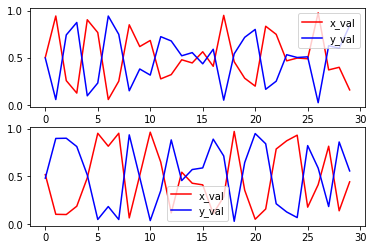

In [4]:
num = 1000
x_train = np.random.rand(num)
y_train = 1 - x_train
x_val = np.random.rand(num)
y_val = 1 - x_val
plt.subplot(211)
plt.plot(x_train[:30], color='r', label='x_val')
plt.plot(y_train[:30], color='b', label='y_val')
plt.legend()
plt.subplot(212)
plt.plot(x_val[:30], color='r', label='x_val')
plt.plot(y_val[:30], color='b', label='y_val')
plt.legend()
plt.show()

In [5]:
model_dir = 'models'
callbacks = list()
''' EarlyStopping '''
callbacks.append(
    keras.callbacks.EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
)
''' ModelCheckpoint '''
# model_name = 'epoch_{epoch:03d}-val_loss_{val_loss:.3f}.hdf5'
# filepath = os.path.join(model_dir, model_name)
# callbacks.append(
#     keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
# )
''' TensorBoard '''
# log_dir = os.path.join(model_dir, 'log')
# callbacks.append(
#     keras.callbacks.TensorBoard(log_dir=log_dir)
# )
''' trainParam '''
batch_size = 64
epochs = 10000

# Train

In [6]:
trainHistory = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

2022-03-25 21:00:00.801811: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-25 21:00:00.803518: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2300000000 Hz


Epoch 1/10000
16/16 [==============================] - 0s 7ms/step - loss: 0.3074 - val_loss: 0.3088
Epoch 2/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.3025 - val_loss: 0.3039
Epoch 3/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2977 - val_loss: 0.2991
Epoch 4/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2931 - val_loss: 0.2943
Epoch 5/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2884 - val_loss: 0.2897
Epoch 6/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2838 - val_loss: 0.2851
Epoch 7/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2794 - val_loss: 0.2806
Epoch 8/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2749 - val_loss: 0.2761
Epoch 9/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2704 - val_loss: 0.2716
Epoch 10/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2660 - val_lo

[array([[-0.999998]], dtype=float32), array([0.9999989], dtype=float32)]


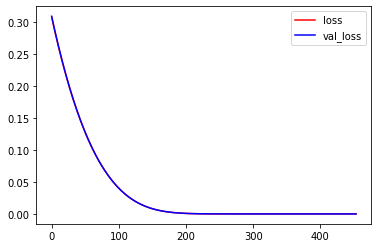

In [7]:
print(model.get_weights())
plt.plot(trainHistory.history['loss'], color='r', label='loss')
plt.plot(trainHistory.history['val_loss'], color='b', label='val_loss')
plt.legend()
plt.show()

# Test

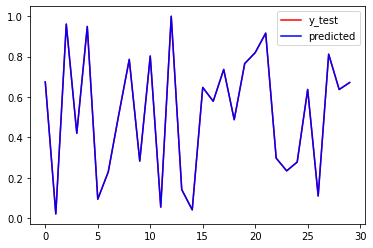

 0.326,  0.674, ads_diff =  0.000
 0.978,  0.022, ads_diff = -0.000
 0.040,  0.960, ads_diff =  0.000
 0.579,  0.421, ads_diff = -0.000
 0.052,  0.948, ads_diff =  0.000
 0.905,  0.095, ads_diff = -0.000
 0.770,  0.230, ads_diff = -0.000
 0.488,  0.512, ads_diff =  0.000
 0.214,  0.786, ads_diff =  0.000
 0.717,  0.283, ads_diff = -0.000
 0.198,  0.802, ads_diff =  0.000
 0.944,  0.056, ads_diff = -0.000
 0.001,  0.999, ads_diff =  0.000
 0.857,  0.143, ads_diff = -0.000
 0.958,  0.042, ads_diff = -0.000
 0.353,  0.647, ads_diff =  0.000
 0.421,  0.579, ads_diff =  0.000
 0.264,  0.736, ads_diff =  0.000
 0.512,  0.488, ads_diff =  0.000
 0.235,  0.765, ads_diff =  0.000
 0.181,  0.819, ads_diff =  0.000
 0.084,  0.916, ads_diff =  0.000
 0.702,  0.298, ads_diff = -0.000
 0.765,  0.235, ads_diff = -0.000
 0.722,  0.278, ads_diff = -0.000
 0.363,  0.637, ads_diff =  0.000
 0.889,  0.111, ads_diff = -0.000
 0.189,  0.811, ads_diff =  0.000
 0.363,  0.637, ads_diff =  0.000
 0.329,  0.671

In [9]:
num = 1000
x_test = np.random.rand(num)
y_test = 1 - x_test
predicted = model.predict(x_test)
plt.plot(y_test[:30], color='r', label='y_test')
plt.plot(predicted[:30], color='b', label='predicted')
plt.legend()
plt.show()
for i in range(100):
    print(f'{x_test[i]:6.3f}, {predicted[i, 0]:6.3f}, ads_diff = {1 - (predicted[i, 0] + x_test[i]):6.3f}')